### Importing the Libraries

In [23]:
import os, cv2, random
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Dense, Conv2D, Flatten, MaxPooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import Model

### Reading the Training Dataset

In [24]:
directory = "./Training Dataset"
categories = ["Grape", "Raisin"]

dataset = []
for category in categories:
    folder = os.path.join(directory, category)
    label = categories.index(category)

    for name in os.listdir(folder):
        image_name = os.path.join(folder, name)
        image = cv2.imread(image_name)
        dataset.append([image, label])

random.shuffle(dataset)

x_train = []
y_train = []

for image, label in dataset:
    x_train.append(image)
    y_train.append(label)

x_train = np.array(x_train)
y_train = np.array(y_train)

### Reading the Validation Dataset

In [25]:
directory = "./Validation Dataset"
categories = ["Grape", "Raisin"]

dataset = []
for category in categories:
    folder = os.path.join(directory, category)
    label = categories.index(category)

    for name in os.listdir(folder):
        image_name = os.path.join(folder, name)
        image = cv2.imread(image_name)
        dataset.append([image, label])

random.shuffle(dataset)

x_val = []
y_val = []

for image, label in dataset:
    x_val.append(image)
    y_val.append(label)

x_val = np.array(x_val)
y_val = np.array(y_val)

### Reading the Test Dataset

In [26]:
directory = "./Test Dataset"
categories = ["Grape", "Raisin"]

dataset = []
for category in categories:
    folder = os.path.join(directory, category)
    label = categories.index(category)

    for name in os.listdir(folder):
        image_name = os.path.join(folder, name)
        image = cv2.imread(image_name)
        dataset.append([image, label])

random.shuffle(dataset)

x_test = []
y_test = []

for image, label in dataset:
    x_test.append(image)
    y_test.append(label)

x_test = np.array(x_test)
y_test = np.array(y_test)

### Function for Generating Label

In [27]:
def get_label(label):
    if not label:
        return "Grape"
    return "Raisin"

### Displaying some samples

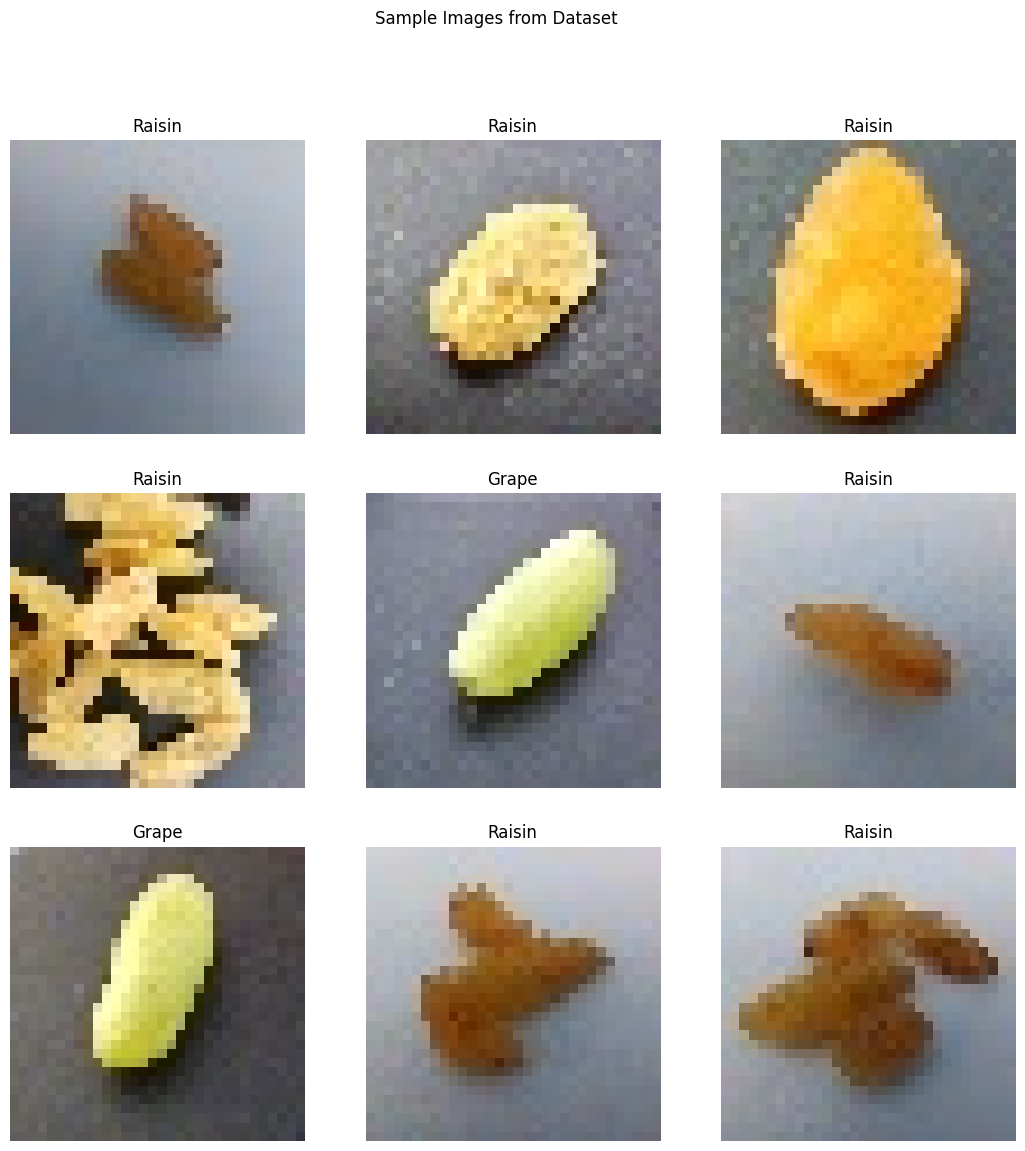

In [28]:
plt.figure(figsize = (13, 13))
for k in range(1, 10):
    plt.subplot(3, 3, k)
    plt.imshow(cv2.cvtColor(x_train[k], cv2.COLOR_BGR2RGB))
    plt.title(get_label(y_train[k]))
    plt.axis("off")

plt.suptitle("Sample Images from Dataset")
plt.show()

### Showing Training, Validation & Test Set Shape

In [29]:
print("Training set:", x_train.shape, y_train.shape)
print("Validation set:", x_val.shape, y_val.shape)
print("Test set:", x_test.shape, y_test.shape)

Training set: (1070, 32, 32, 3) (1070,)
Validation set: (260, 32, 32, 3) (260,)
Test set: (420, 32, 32, 3) (420,)


### Building the Model

In [30]:
inputs = Input(shape = (32, 32, 3))

x = Conv2D(64, (3, 3), activation = "relu")(inputs)
x = Conv2D(64, (3, 3), activation = "relu")(x)
x = MaxPooling2D((2, 2))(x)

x = Conv2D(64, (3, 3), activation = "relu")(x)
x = Conv2D(64, (3, 3), activation = "relu")(x)
x = Conv2D(64, (3, 3), activation = "relu")(x)
x = MaxPooling2D((2, 2))(x)

x = Conv2D(32, (3, 3), activation = "relu")(x)
x = MaxPooling2D((2, 2))(x)
x = Flatten()(x)

x = Dense(512, activation = "relu")(x)
x = Dense(256, activation = "relu")(x)
x = Dense(128, activation = "relu")(x)

outputs = Dense(1, activation = "sigmoid")(x)

model = Model(inputs = inputs, outputs = outputs)

model.compile(optimizer = Adam(0.0001), loss = "binary_crossentropy", metrics = ["accuracy"])
model.summary()

Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 30, 30, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 28, 28, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 12, 12, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_15 (Conv2D)              │ (None, 10, 10, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_16 (Conv2D)              │ (None, 8, 8, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 4, 4, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_17 (Conv2D)              │ (None, 2, 2, 32)       │        18,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 1, 1, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 512)            │        16,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 349,217 (1.33 MB)

 Trainable params: 349,217 (1.33 MB)

 Non-trainable params: 0 (0.00 B)

In [31]:
history = model.fit(x_train, y_train, epochs = 50, validation_data = (x_val, y_val))

Epoch 1/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 3s 41ms/step - accuracy: 0.5155 - loss: 1.3909 - val_accuracy: 0.9154 - val_loss: 0.4761
Epoch 2/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.8686 - loss: 0.3974 - val_accuracy: 0.9885 - val_loss: 0.0742
Epoch 3/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.9513 - loss: 0.1379 - val_accuracy: 0.9885 - val_loss: 0.0495
Epoch 4/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - accuracy: 0.9897 - loss: 0.0451 - val_accuracy: 0.9808 - val_loss: 0.0549
Epoch 5/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - accuracy: 0.9994 - loss: 0.0113 - val_accuracy: 0.9962 - val_loss: 0.0228
Epoch 6/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 1.0000 - loss: 0.0047 - val_accuracy: 0.9846 - val_loss: 0.0364
Epoch 7/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - accuracy: 0.9997 - loss: 0.0049 - val_accuracy: 0.9962 - val_loss: 0.0226
Epoch 8/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - accuracy: 0.9982 - loss: 0.0054 - val_accuracy: 0.9962 - v

### Plotting The Accuracy & Loss Graph

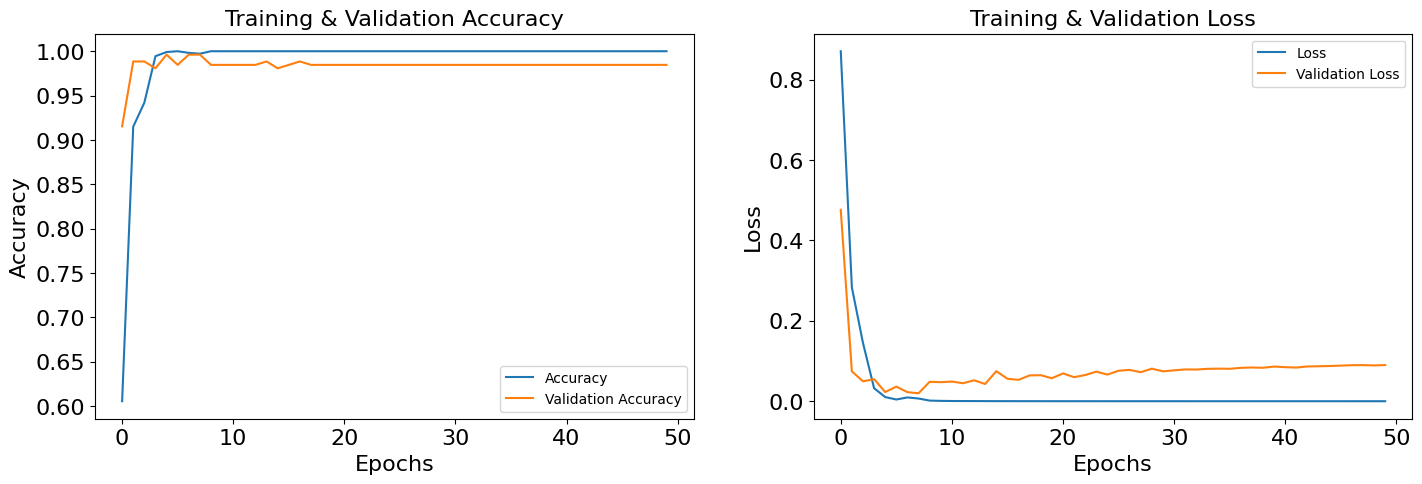

In [32]:
plt.figure(figsize = (17, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history["accuracy"], label = "Accuracy")
plt.plot(history.history["val_accuracy"], label = "Validation Accuracy")
plt.title("Training & Validation Accuracy", fontsize = 16)
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
plt.xlabel("Epochs", fontsize = 16)
plt.ylabel("Accuracy", fontsize = 16)
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history["loss"], label = "Loss")
plt.plot(history.history["val_loss"], label = "Validation Loss")
plt.title("Training & Validation Loss", fontsize = 16)
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
plt.xlabel("Epochs", fontsize = 16)
plt.ylabel("Loss", fontsize = 16)
plt.legend()
plt.show()

### Evaluating the Model on Test Set

In [33]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)

print(f"Test Accuracy: {round(test_accuracy * 100, 2)}%")

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8364 - loss: 1.4143
Test Accuracy: 82.14%
